In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Chargement de base PRC

In [38]:
df=pd.read_excel("Data_Breach_Chronology_sample.xlsx")

In [39]:
df.columns

Index(['id', 'source', 'org_name', 'acceptable_names', 'org_name_explanation',
       'reported_date', 'breach_date', 'end_breach_date', 'incident_details',
       'date_info_explanation', 'information_affected',
       'information_affected_explanation', 'organization_type',
       'organization_type_explanation', 'breach_type',
       'breach_type_explanation', 'group_uuid', 'normalized_org_name',
       'normalized_org_name_explanation', 'group_org_breach_type',
       'group_org_breach_type_explanation', 'group_org_type',
       'group_org_type_explanation', 'total_affected', 'residents_affected',
       'impact_info_explanation', 'breach_location_street',
       'breach_location_city', 'breach_location_state', 'breach_location_zip',
       'breach_location_country', 'breach_location_explanation', 'tags',
       'source_url', 'notification_url_original', 'created_at', 'updated_at'],
      dtype='object')

## Traitement de données 

In [40]:

variables = [
    "id",
    "organization_type",
    "incident_details",
    "breach_type",
    "reported_date",
    "breach_date",
    "end_breach_date",
    "total_affected",
    "residents_affected",
    "breach_location_city",
    "breach_location_state",
    "breach_location_country"
]
df=df[variables]

In [43]:
df.dtypes

id                         object
organization_type          object
incident_details           object
breach_type                object
reported_date              object
breach_date                object
end_breach_date            object
total_affected             object
residents_affected         object
breach_location_city       object
breach_location_state      object
breach_location_country    object
dtype: object

In [ ]:

df_filtré = df[df['total_affected'] != 'UNKN']
df_filtré=df_filtré[df_filtré['breach_date'] != 'UNKN']
df_filtré['breach_date'] = pd.to_datetime(df_filtré['breach_date'], errors='coerce')
df_filtré['total_affected'] = pd.to_numeric(df_filtré['total_affected'], errors='coerce')

In [55]:
df_filtré.head(4)

,id,organization_type,incident_details,breach_type,reported_date,breach_date,end_breach_date,total_affected,residents_affected,breach_location_city,breach_location_state,breach_location_country
0,9e38b3ea-ae63-5d83-aaed-73952834000f,EDU,The Indiana Office of the Attorney General rep...,UNKN,2020-10-30,2019-12-01,UNKN,1976,11,UNKN,UNKN,UNKN
1,3baa552d-66af-5371-b32e-05aa3c540031,BSF,"On February 25, 2021, the Maryland Office of t...",HACK,2021-02-25,2020-12-21,2020-12-21,383,383,Towson,MD,United States
5,01b836ca-bdc7-5eda-b4af-94962b50beda,UNKN,The Indiana Office of the Attorney General rep...,UNKN,2017-11-15,2017-08-11,UNKN,1376,13,UNKN,UNKN,UNKN
8,bcf02ac1-8d9f-56bf-b588-b7ca0c5d116c,MED,The Indiana Office of the Attorney General rep...,UNKN,2021-04-08,2020-02-03,UNKN,24037,566,UNKN,UNKN,UNKN


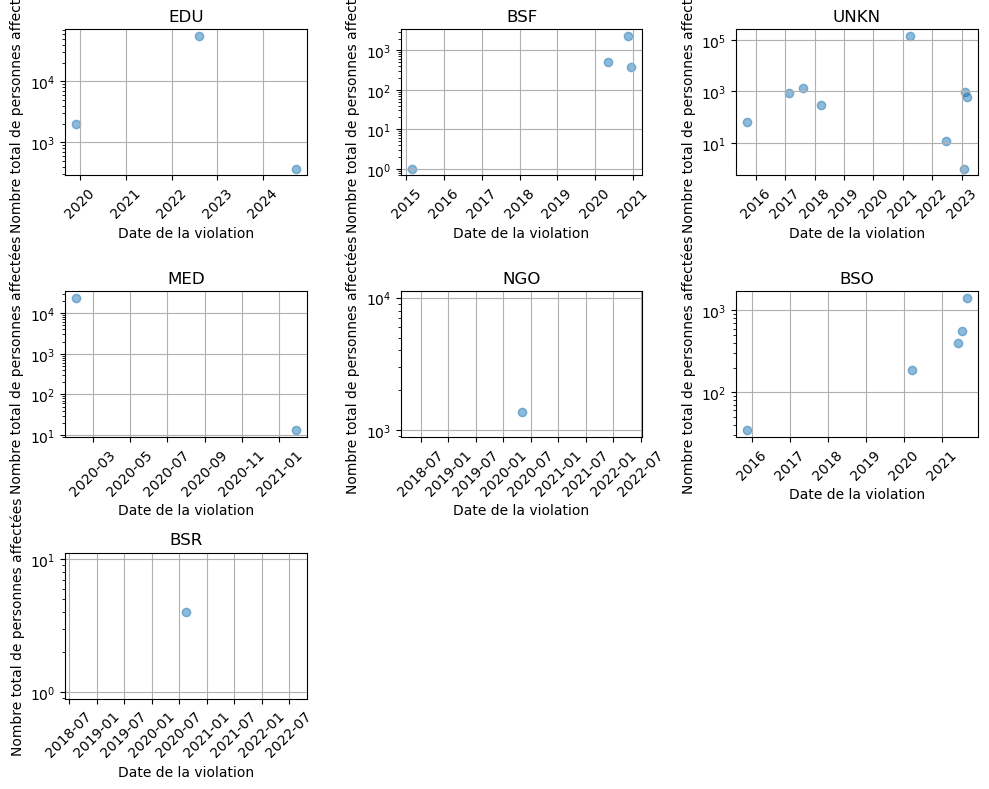

In [56]:


# Conversion de la date
df_filtré['breach_date'] = pd.to_datetime(df_filtré['breach_date'])

# Liste des types d'organisation uniques
unique_org_types = df_filtré['organization_type'].unique()

# Définir la grille : 3 lignes, 3 colonnes
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8), sharex=False)

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Tracer chaque sous-graphe
for i, org_type in enumerate(unique_org_types):
    ax = axes[i]
    subset = df_filtré[df_filtré['organization_type'] == org_type]
    ax.scatter(subset['breach_date'], subset['total_affected'], alpha=0.5)
    ax.set_yscale('log')
    ax.set_title(org_type)
    ax.set_xlabel('Date de la violation')
    ax.set_ylabel('Nombre total de personnes affectées')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # Rotation des dates pour lisibilité

# Supprimer les axes inutilisés s'il y a moins de 9 types
for j in range(len(unique_org_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [57]:
# Analyse du nombre de personnes affectées

# Statistiques descriptives pour la variable 'total_affected'
stats = df_filtré['total_affected'].describe()

print(stats)

count        31.000000
mean       7551.967742
std       26763.925560
min           1.000000
25%          44.500000
50%         383.000000
75%        1168.500000
max      140000.000000
Name: total_affected, dtype: float64


La moyenne est très décalée par rapport à la médiane ce qui montre que notre variable qui évalue la sévérité d'une attaque cyber est à queue lourde. Le graphique qui suite conforte bien nos observations :

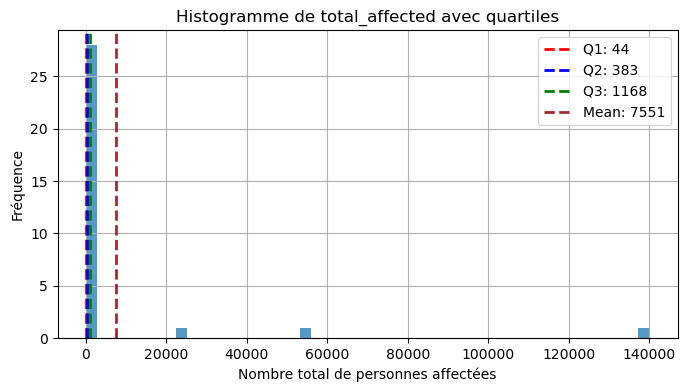

In [73]:
# Calcul des quartiles
Q1 = df_filtré['total_affected'].quantile(0.25)
Q2 = df_filtré['total_affected'].quantile(0.50)
Q3 = df_filtré['total_affected'].quantile(0.75)
moy=np.mean(df_filtré['total_affected'])

# Création de l'histogramme
plt.figure(figsize=(8, 4))
plt.hist(df_filtré['total_affected'], bins=50, alpha=0.75)

# Ajout des lignes verticales pour les quartiles
plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2, label=f'Q1: {int(Q1)}')
plt.axvline(Q2, color='blue', linestyle='dashed', linewidth=2, label=f'Q2: {int(Q2)}')
plt.axvline(Q3, color='green', linestyle='dashed', linewidth=2, label=f'Q3: {int(Q3)}')
plt.axvline(moy, color='brown', linestyle='dashed', linewidth=2, label=f'Mean: {int(moy)}')

# Titres et légendes
plt.title('Histogramme de total_affected avec quartiles')
plt.xlabel('Nombre total de personnes affectées')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Calcul des statistiques descriptives groupées
stats = df_filtré.groupby('organization_type')['total_affected'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

# Renommer les colonnes pour correspondre au tableau souhaité
stats = stats.rename(columns={
    'count': 'Number',
    'mean': 'Mean',
    '25%': 'q0.25',
    '50%': 'Median',
    '75%': 'q0.75',
    '90%': 'q0.9',
    '95%': 'q0.95',
    'max': 'Max'
})
# Afficher le tableau
base=stats[['Number', 'Mean', 'q0.25', 'Median', 'q0.75', 'q0.9', 'q0.95', 'Max']]
base

,Number,Mean,q0.25,Median,q0.75,q0.9,q0.95,Max
organization_type,,,,,,,,
BSF,4.0,804.750000,287.5,450.0,967.25,1777.7,2047.85,2318.0
BSO,6.0,519.000000,242.0,450.0,543.25,995.5,1214.25,1433.0
BSR,3.0,135.333333,62.5,121.0,201.00,249.0,265.00,281.0
EDU,3.0,19223.333333,1173.0,1976.0,28650.00,44654.4,49989.20,55324.0
MED,2.0,12025.000000,6019.0,12025.0,18031.00,21634.6,22835.80,24037.0
NGO,3.0,481.000000,28.5,55.0,720.50,1119.8,1252.90,1386.0
UNKN,10.0,14420.900000,25.0,463.0,936.50,15238.4,77619.20,140000.0


In [ ]:
# Analyse du nombre d'incidences en fonction du type d'organisation touchée

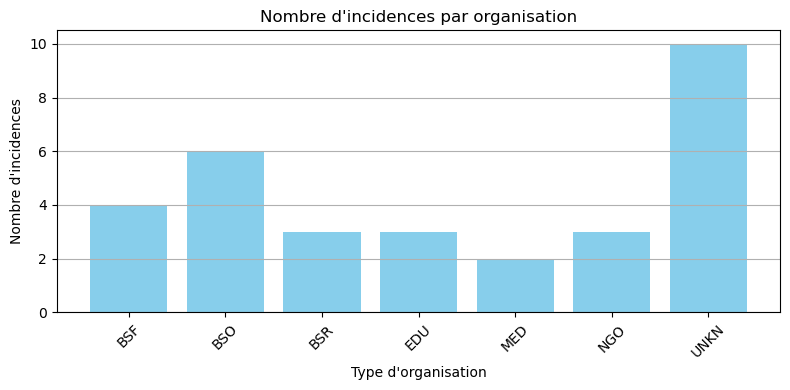

In [76]:
# Compter les occurrences par année
yearly_counts = df_filtré['organization_type'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par organisation")
plt.xlabel("Type d'organisation")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Analyse du nombre d'incidences en fonction du type de brèche

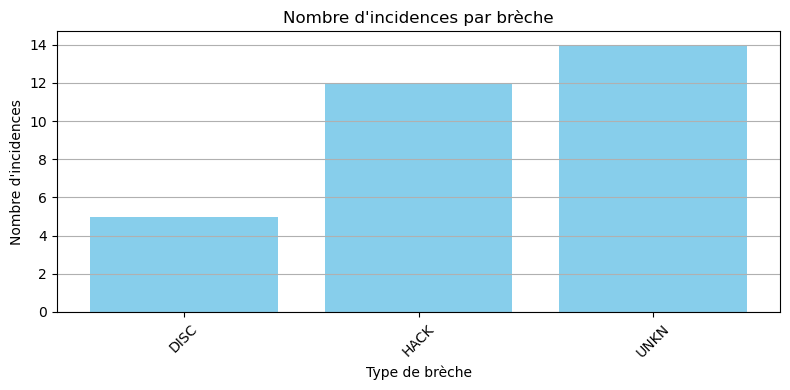

In [75]:

# Compter les occurrences par année
yearly_counts = df_filtré['breach_type'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par brèche")
plt.xlabel("Type de brèche")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Analyse du nombre d'incidences en fonction de l'année

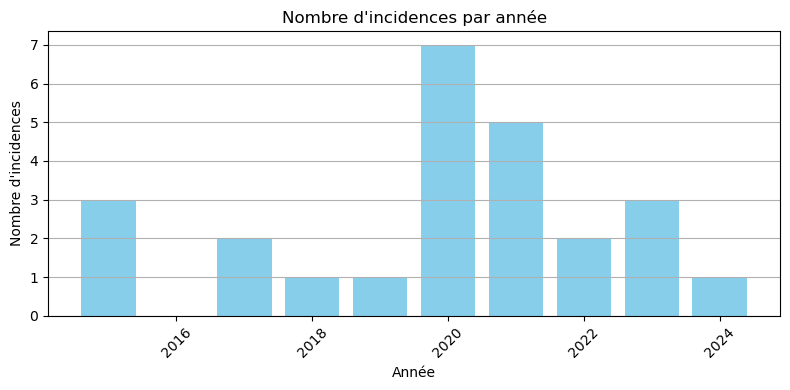

In [72]:

# Extraire l'année
df_filtré['year'] = df_filtré['breach_date'].dt.year

# Compter les occurrences par année
yearly_counts = df_filtré['year'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Réseau de neurone 

### Word embeding 

In [ ]:
#### Tokenisation

In [77]:
document_1 = "le chat mange la souris"
document_2 = "le chien regarde le canard"
document_3 = "le canard regarde le chat"
corpus = (document_1, document_2, document_3)

In [80]:
# construction du vocabulaire
vocabulary = []
for d in corpus:
    for w in d.split(" "):
        if w not in vocabulary:
            vocabulary.append(w)


In [81]:
vocabulary

['le', 'chat', 'mange', 'la', 'souris', 'chien', 'regarde', 'canard']

In [88]:
# initialisation de l'histogramme
freq = dict()
for v in vocabulary:
    freq[v] = 0

{'le': 5, 'chat': 2, 'mange': 1, 'la': 1, 'souris': 1, 'chien': 1, 'regarde': 2, 'canard': 2}


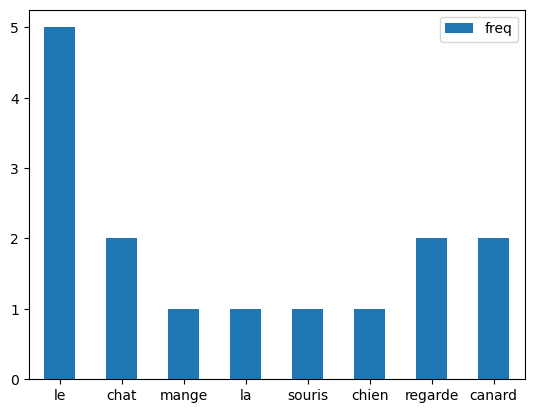

In [90]:
# comptage des occurrences
for d in corpus:
    for w in d.split(" "):
        freq[w] += 1
print(freq)
df = pd.DataFrame({'freq':freq.values()}, index=freq.keys())
ax = df.plot.bar(rot=0)
plt.show()


In [ ]:
# calcul d'un histogramme par document
import numpy as np
V = len(vocabulary)
D = len(corpus)
tf_idf = np.zeros([D, V])
for i, d in enumerate(corpus):
    for w in d.split(" "):
        j = vocabulary.index(w)
        tf_idf[i,j] += 1
        
print(tf_idf)

[[1. 1. 1. 1. 1. 0. 0. 0.]
 [2. 0. 0. 0. 0. 1. 1. 1.]
 [2. 1. 0. 0. 0. 0. 1. 1.]]


In [97]:
vocabulary

['le', 'chat', 'mange', 'la', 'souris', 'chien', 'regarde', 'canard']

In [96]:
corpus

('le chat mange la souris',
 'le chien regarde le canard',
 'le canard regarde le chat')

In [93]:
enumerate(corpus)

##### Word2vec

In [ ]:
# pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [114]:
from gensim.models import Word2Vec

In [ ]:
# données d'entraînement tokenisation
p_1=document_1.split(" ")
p_2=document_2.split(" ")
p_3=document_3.split(" ")

corpus=[p_1,p_2,p_3]

In [171]:
# Paramétrage de l'entraînement
model = Word2Vec(min_count=1, vector_size=5)

In [172]:
# creation du dictionnaire 
model.build_vocab(corpus) 

In [170]:
corpus

[['le', 'chat', 'mange', 'la', 'souris'],
 ['le', 'chien', 'regarde', 'le', 'canard'],
 ['le', 'canard', 'regarde', 'le', 'chat']]

In [173]:
model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)

(7, 75)

In [178]:
print(list(model.wv.index_to_key[:10]))  # Adjust the number to see more


['le', 'canard', 'regarde', 'chat', 'chien', 'souris', 'la', 'mange']


In [175]:
model.wv['chat']

array([-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897636],
      dtype=float32)

In [180]:
#model.wv['souris']
print(model.wv.most_similar(positive=['chien'] ,topn=3))


[('canard', 0.072651706635952), ('regarde', -0.06693901866674423), ('la', -0.08407305926084518)]


In [150]:
model.wv.most_similar(positive=['i'])  # replace with a word that exists


[('s', 0.8910180330276489),
 ('g', 0.6962215304374695),
 ('n', 0.2676145136356354),
 ('o', 0.17698265612125397),
 ('t', 0.12614069879055023),
 ('e', 0.1008276417851448),
 ('h', 0.05328153073787689),
 ('d', -0.024481425061821938),
 ('l', -0.04286862164735794),
 ('c', -0.23543481528759003)]

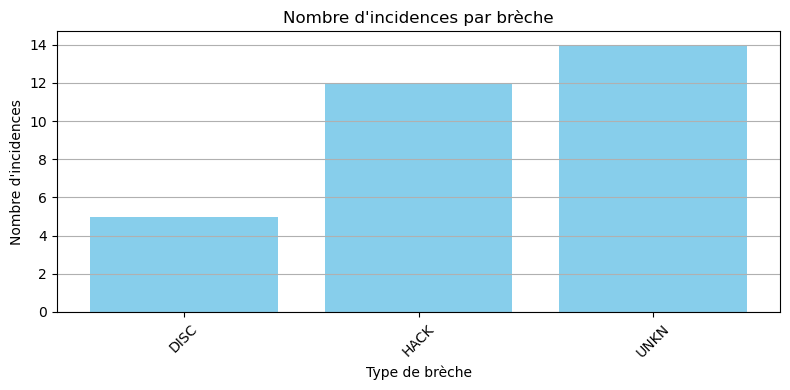

In [98]:
# Compter les occurrences par année
yearly_counts = df_filtré['breach_type'].value_counts().sort_index()

# Créer le graphique
plt.figure(figsize=(8, 4))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')

# Ajouter les étiquettes
plt.title("Nombre d'incidences par brèche")
plt.xlabel("Type de brèche")
plt.ylabel("Nombre d'incidences")

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Perceptron 

In [82]:
corpus

('le chat mange la souris',
 'le chien regarde le canard',
 'le canard regarde le chat')

In [85]:
d.split()

['le', 'canard', 'regarde', 'le', 'chat']

In [86]:
d

'le canard regarde le chat'